In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

In [92]:
data = pd.read_csv('./train_data.csv', delimiter=',', index_col=0)
data.head()

,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
ID,,,,,,,,,,,,,,,
1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [6]:
data.shape

(59966, 16)

In [9]:
# check if the data types are all right
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            59966 non-null  int64 
 1   HealthServiceArea             59966 non-null  object
 2   Gender                        59966 non-null  object
 3   Race                          59966 non-null  object
 4   TypeOfAdmission               59966 non-null  object
 5   CCSProcedureCode              59966 non-null  int64 
 6   APRSeverityOfIllnessCode      59966 non-null  int64 
 7   PaymentTypology               59966 non-null  object
 8   BirthWeight                   59966 non-null  int64 
 9   EmergencyDepartmentIndicator  59966 non-null  object
 10  AverageCostInCounty           59966 non-null  int64 
 11  AverageChargesInCounty        59966 non-null  int64 
 12  AverageCostInFacility         59966 non-null  int64 
 13  AverageChargesIn

In [4]:
data.describe()

,ID,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,29983.500000,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,17310.837458,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,1.000000,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,14992.250000,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,29983.500000,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,44974.750000,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,59966.000000,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


In [5]:
# check if there are any NaNs
pd.isna(data).sum()

ID                              0
HealthServiceArea               0
Gender                          0
Race                            0
TypeOfAdmission                 0
CCSProcedureCode                0
APRSeverityOfIllnessCode        0
PaymentTypology                 0
BirthWeight                     0
EmergencyDepartmentIndicator    0
AverageCostInCounty             0
AverageChargesInCounty          0
AverageCostInFacility           0
AverageChargesInFacility        0
AverageIncomeInZipCode          0
LengthOfStay                    0
dtype: int64

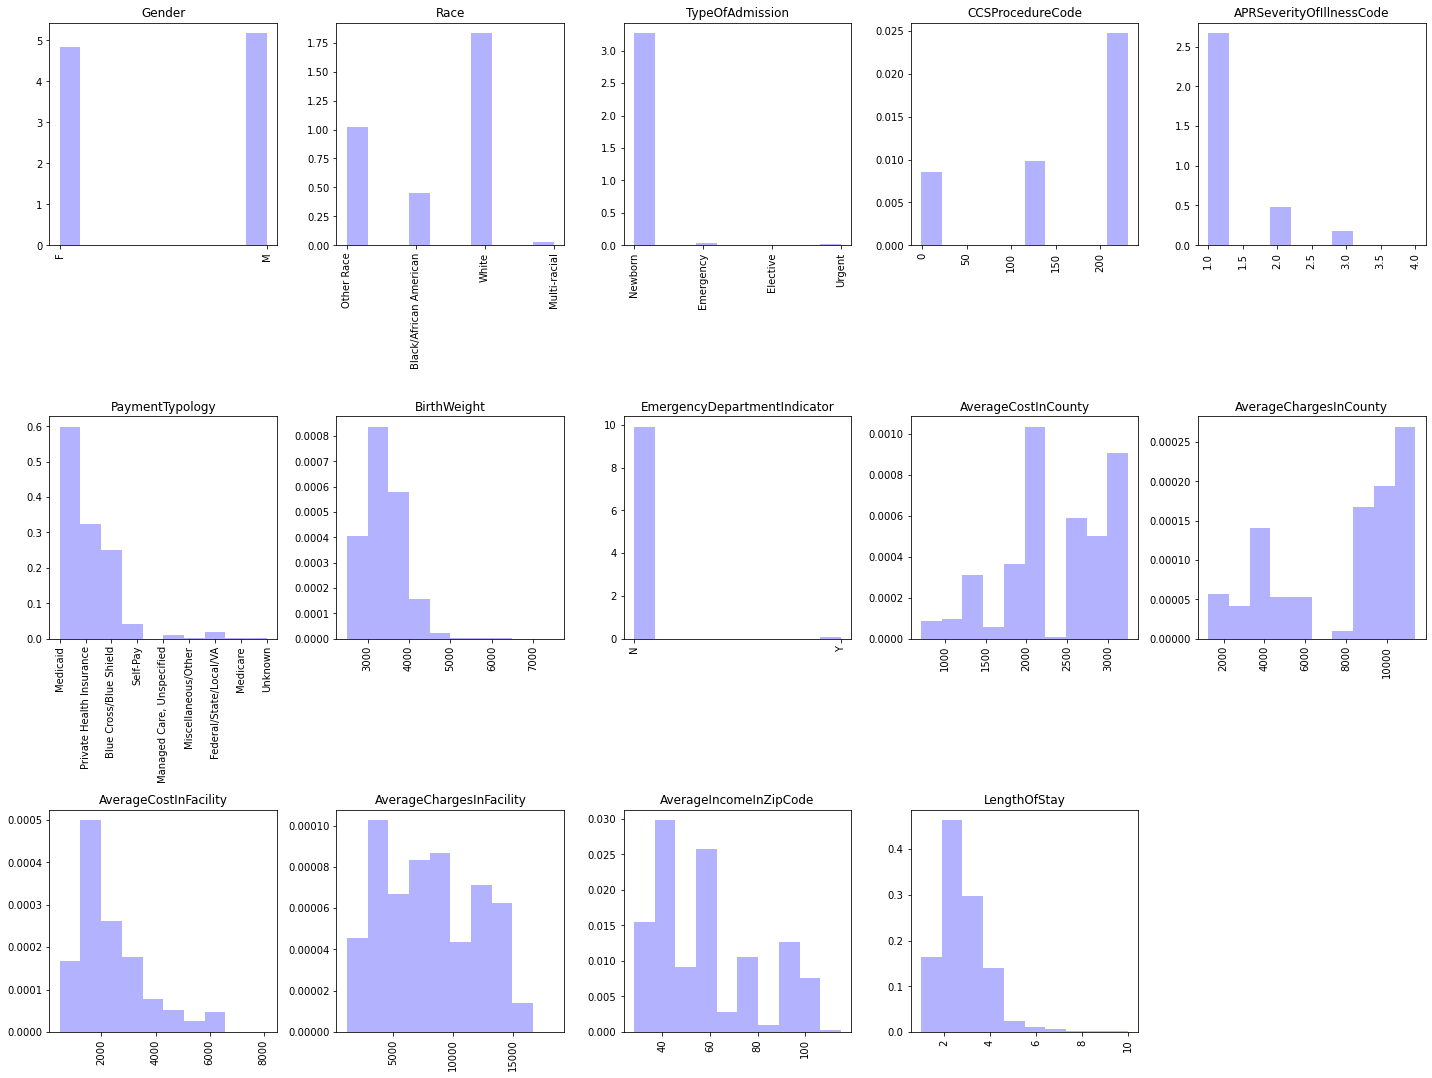

In [78]:
# let's see data distribution

plt.figure(figsize=(20,20))
for i, col in enumerate(data.columns):
    plt.subplot(4,5,i+1)
    plt.hist(data[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.tight_layout()

In [95]:
data['Gender'].value_counts()
data[data['Gender']=='U']

,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
ID,,,,,,,,,,,,,,,


In [94]:
# The gender column has a anomaly which can be removed because there is only one of it.
data.drop(56745, axis=0, inplace=True)

In [96]:
# HealthServiceArea is not a attribute, so drop it.
data.drop('HealthServiceArea', axis=1, inplace=True)

In [16]:
data['Race'].value_counts()

White                     32942
Other Race                18314
Black/African American     8183
Multi-racial                526
Name: Race, dtype: int64

In [17]:
data['TypeOfAdmission'].value_counts()

Newborn      58740
Emergency      659
Urgent         412
Elective       154
Name: TypeOfAdmission, dtype: int64

In [18]:
data['CCSProcedureCode'].value_counts()

 228    19886
 115    13628
 0      11189
 220    10773
 231     2980
-1        769
 216      740
Name: CCSProcedureCode, dtype: int64

In [19]:
data['APRSeverityOfIllnessCode'].value_counts()

1    47953
2     8759
3     3252
4        1
Name: APRSeverityOfIllnessCode, dtype: int64

In [20]:
data['PaymentTypology'].value_counts()

Medicaid                     28722
Private Health Insurance     15608
Blue Cross/Blue Shield       12073
Self-Pay                      1984
Federal/State/Local/VA         849
Managed Care, Unspecified      545
Miscellaneous/Other            118
Medicare                        44
Unknown                         22
Name: PaymentTypology, dtype: int64

In [21]:
data['EmergencyDepartmentIndicator'].value_counts()

N    59452
Y      513
Name: EmergencyDepartmentIndicator, dtype: int64

In [22]:
data['AverageIncomeInZipCode'].value_counts()

45     10961
96      6538
59      6355
34      4552
74      4375
36      3278
104     3026
58      2675
43      1944
41      1884
55      1690
56      1597
52      1568
48      1148
77      1102
57      1090
68       957
44       768
99       731
47       718
53       689
64       477
46       427
28       272
83       264
103      234
84       158
115      145
50       109
81       100
54        91
95        37
49         5
Name: AverageIncomeInZipCode, dtype: int64

In [23]:
data['LengthOfStay'].value_counts()

2     25000
3     16000
1      8895
4      7503
5      1342
6       557
7       346
8       145
9        97
10       80
Name: LengthOfStay, dtype: int64

In [25]:
data['AverageCostInCounty'].value_counts()

3155    10362
2611     6786
2208     6090
2785     6011
2041     5732
1826     4750
3242     3412
2158     2846
1371     1981
2533     1458
1445     1033
994       976
2756      943
1304      913
2834      574
746       539
2653      495
2018      483
712       461
2209      458
1732      389
1439      385
1446      296
854       277
1018      260
1607      218
1742      212
1665      210
1860      208
1562      200
1511      195
1091      192
2508      179
2318      151
1352      123
2777       84
1996       83
Name: AverageCostInCounty, dtype: int64

In [97]:
# seperate target and features.
features = data.drop('LengthOfStay', axis=1)
target = (data['LengthOfStay'] >= 4).astype(int)
data['LengthOfStay'] = target

data['LengthOfStay'].value_counts()

0    49895
1    10070
Name: LengthOfStay, dtype: int64

<AxesSubplot:ylabel='Frequency'>

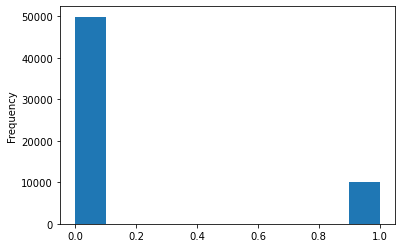

In [59]:
target.plot(kind='hist')

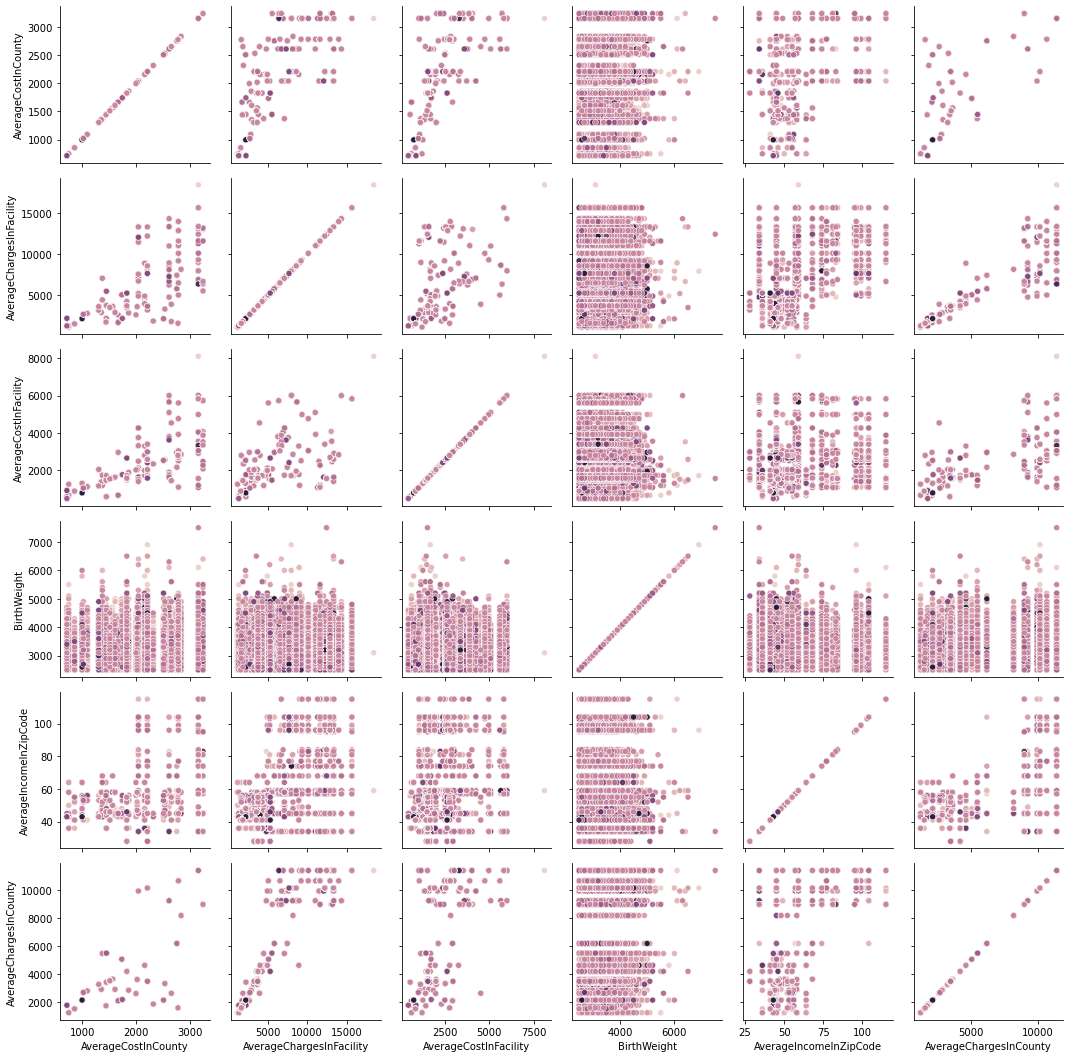

In [40]:
g = sns.PairGrid(data, vars=minmax_attributes, hue="LengthOfStay")
g.map(sns.scatterplot)
plt.show()

In [37]:
norminal_attributes = ['Gender','Race','TypeOfAdmission','CCSProcedureCode','APRSeverityOfIllnessCode', 'PaymentTypology', 'EmergencyDepartmentIndicator']
numerical_attributes = list(set(features.columns).difference(set(norminal_attributes)))

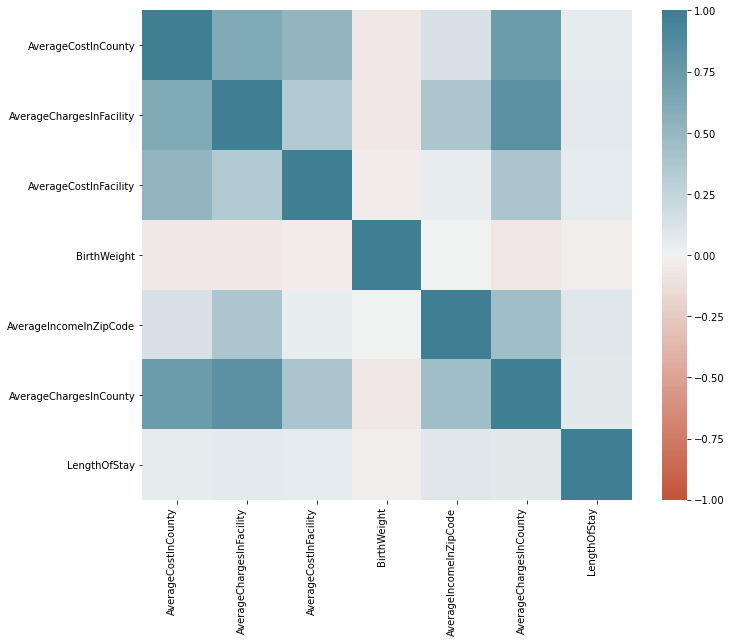

In [98]:
f, ax = plt.subplots(figsize=(11, 9))
corr = data[numerical_attributes + ['LengthOfStay']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

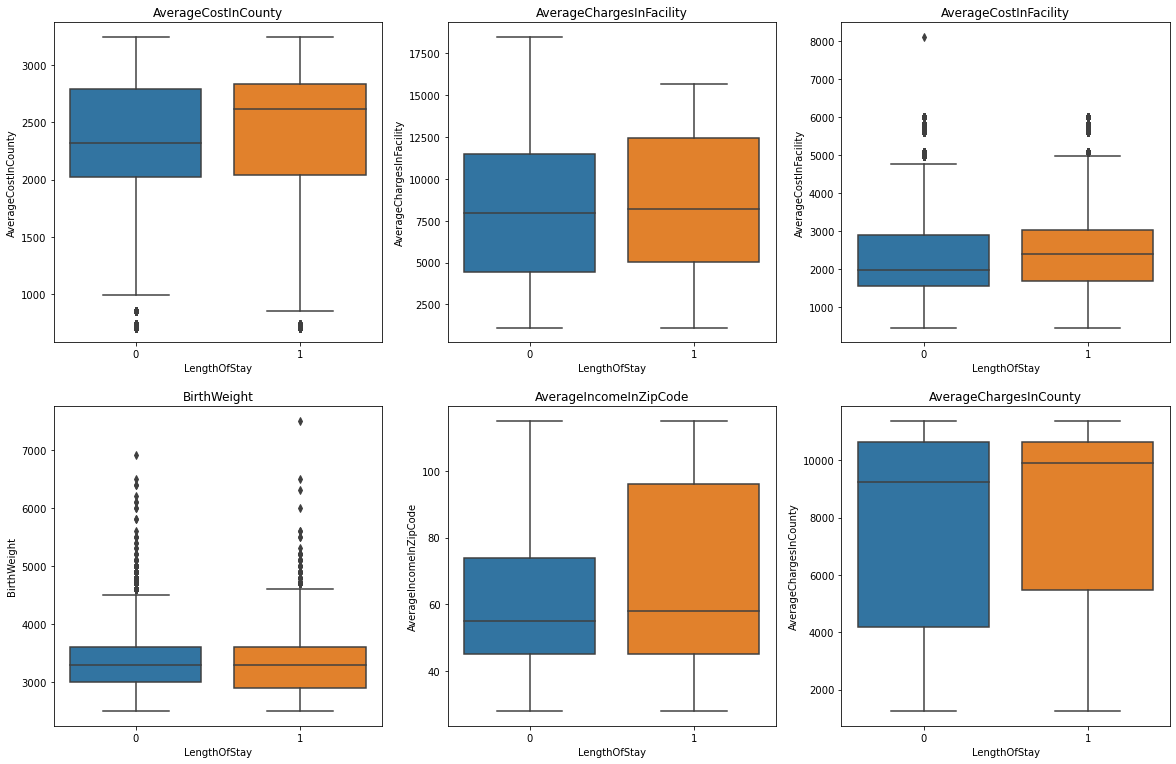

In [99]:
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_attributes):
    plt.subplot(3,3,i+1)
#     plt.boxplot(features[col])
    ax = sns.boxplot(y=col,x='LengthOfStay',data=data)
    plt.title(col)

The target is categorical, so this notebook tries to use logistic regression to solve it.

In [100]:
# data copy
data_for_logistical_rgression = data.copy()

In [62]:
features_scaled = features[numerical_attributes].copy()

transform_attributes = ['AverageCostInFacility', 'AverageIncomeInZipCode']
powertransformer = PowerTransformer(standardize=False).fit(features_scaled.loc[:, transform_attributes])
features_scaled.loc[:, transform_attributes] = powertransformer.transform(features_scaled.loc[:, transform_attributes])

minmaxscaler = MinMaxScaler().fit(features_scaled.loc[:, minmax_attributes])
features_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(features_scaled.loc[:, minmax_attributes])

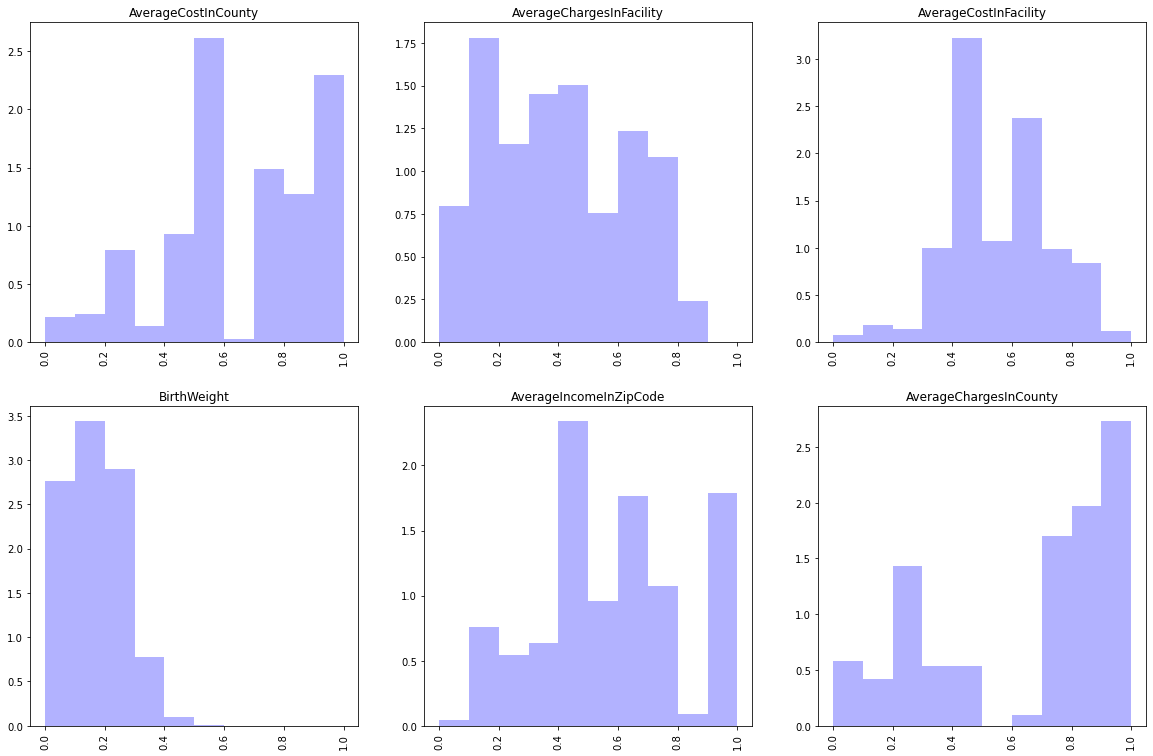

In [80]:
plt.figure(figsize=(20,20))
for i, col in enumerate(features_scaled.columns):
    plt.subplot(3,3,i+1)
    plt.hist(features_scaled[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

1. The gender column has a anomaly which can be removed because there is only one of it.
2. 